In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pgRun import main as pgMain
import matplotlib.pyplot as plt
import viz

COLORS, PAGE_WIDTH, ROW_HEIGHT = viz.set_plots()


#rolling mean in numpy:

def rolling_mean(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


In [3]:
prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True)
prices2023 = prices.loc[
        f"2023-01-01" :f"2023-01-31"
    ].lmp

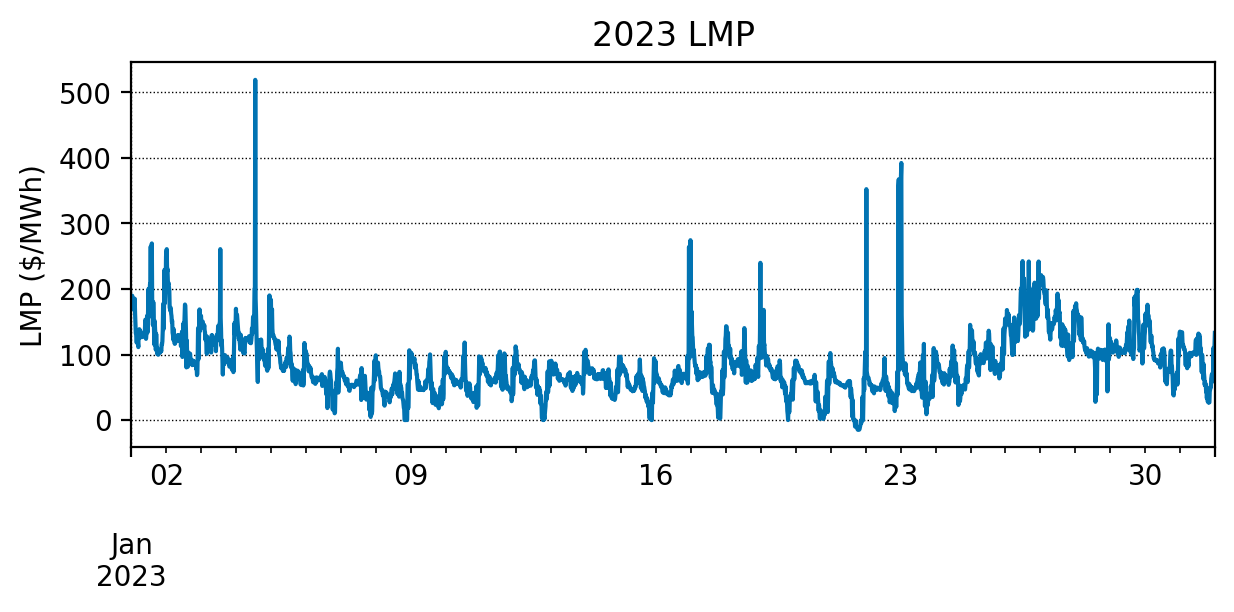

In [4]:
f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
prices2023.plot(ax=ax)
ax.set_title("2023 LMP")
ax.set_ylabel("LMP ($/MWh)")
plt.show()

In [32]:
pgMain(nYears = None, nMonths = 10, month = [1], test = 1, NEpisodes = 10, num_batches = 300) # 300

100%|██████████| 300/300 [04:50<00:00,  1.03it/s]


0
Total profit: 11657.308494207646
Mean profit: 11657.308494207646


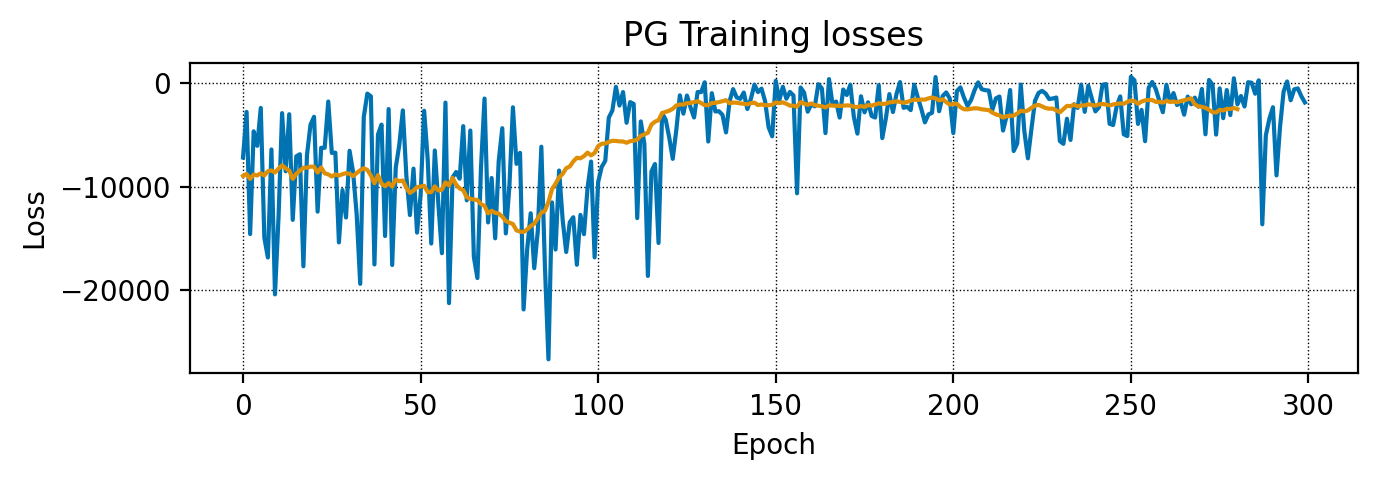

In [34]:
losses = np.load("PGResults/pg_losses.npy")

f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
ax.plot(losses, label="Loss")
ax.plot(rolling_mean(losses, 20), label="Rolling Mean")
ax.set_title("PG Training losses")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.tight_layout()
f.savefig("PGResults/pg_losses.png")
plt.show()

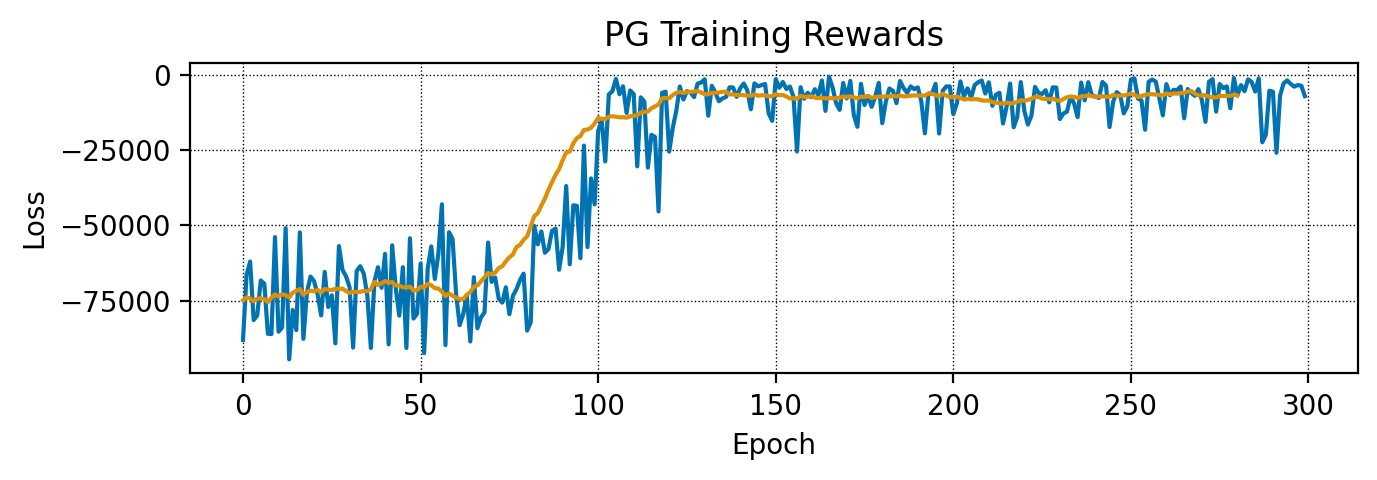

In [35]:
rewards = np.load("PGResults/pg_rewards.npy")

f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
ax.plot(rewards, label="Loss")
ax.plot(rolling_mean(rewards, 20), label="Rolling Mean")
ax.set_title("PG Training Rewards")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.tight_layout()
f.savefig("PGResults/pg_rewards.png")
plt.show()

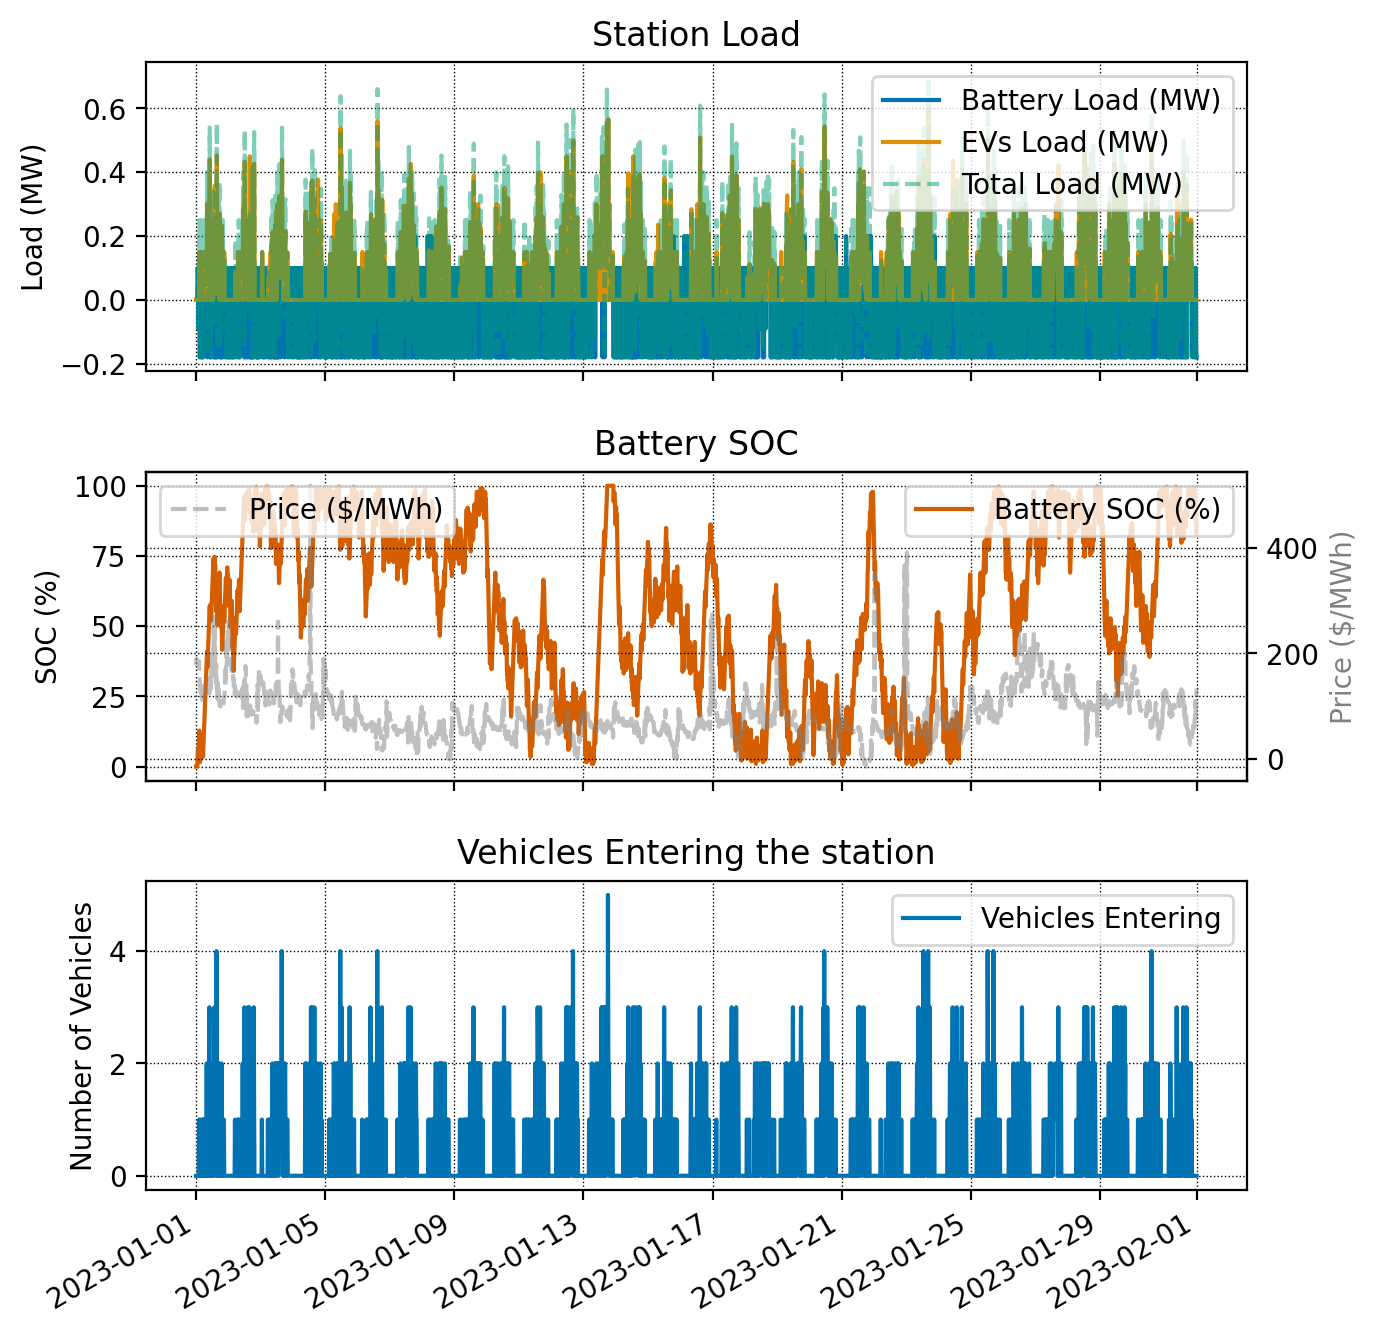

In [36]:
history = pd.read_csv("PGResults/pg_history.csv", index_col=0, parse_dates=True)

START, END = "2023-01-01", "2023-01-31"

viz.plotOperations(history, START, END, save_path="PGResults/policy.png")

In [22]:
from policy_gradient import PolicyGradient
from tqdm import tqdm
rewards = []
max_power = []
for _ in tqdm(range(100)):
    PG = PolicyGradient([], 0, 0)
    pricesTest = pd.concat([prices2023[-4:], prices2023])
    history = PG.test(pricesTest)
    rewards.append(history.reward.sum())
    max_power.append(history.load.max())
    # print(history.reward.sum())

print("Reward Metrics: ", np.mean(rewards), "$")
print("Max Power Metrics: ", np.mean(max_power), "MW")


100%|██████████| 100/100 [05:16<00:00,  3.17s/it]

Reward Metrics:  11346.000718916157 $
Max Power Metrics:  0.6865883171482682 MW
